# **SMS SPAM DETECTION**

# **SMS SPAM CLASSIFICATION**

# Import Libraries #

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Load Dataset

In [2]:
df = pd.read_csv("spam.csv",encoding = 'cp1252')

In [3]:
# checking datashape
df.shape

(5572, 5)

# **Stages Of the Project**

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

# 1. Data Cleaning #

In [4]:
# we are checking datainfo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
df.sample(5)

,v1,v2
1343,ham,Crazy ar he's married. ÌÏ like gd looking guys...
1165,ham,"Haha yeah I see that now, be there in a sec"
3195,ham,"I av a new number, . Wil u only use this one,ta."
5300,ham,I can't make it tonight
1685,ham,Cramps stopped. Going back to sleep


In [6]:
# rename the columns
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
1691,ham,I don't know but I'm raping dudes at poker
324,ham,No problem. How are you doing?
639,ham,I had askd u a question some hours before. Its...
1401,ham,Kaiez... Enjoy ur tuition... Gee... Thk e seco...
3945,ham,How u doin baby girl ?? hope u are okay every ...


In [7]:
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check dupliacated values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep="first")

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

# 2. **Exploratory Data Analysis** 

In [15]:
# we are checking value counts
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

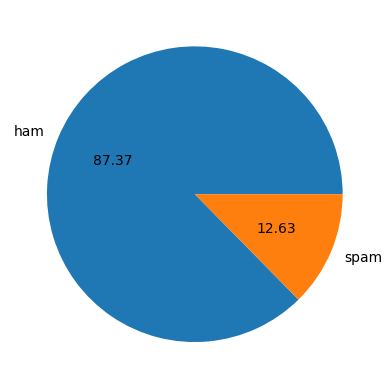

In [16]:
# we make pie chart
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [17]:
df["num_characters"] = df["text"].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# number of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# num of sentences 
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
# we are checking stats of the last 3 columns
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# we check stats of the Ham SMS
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# We check stats of the Spam SMS
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

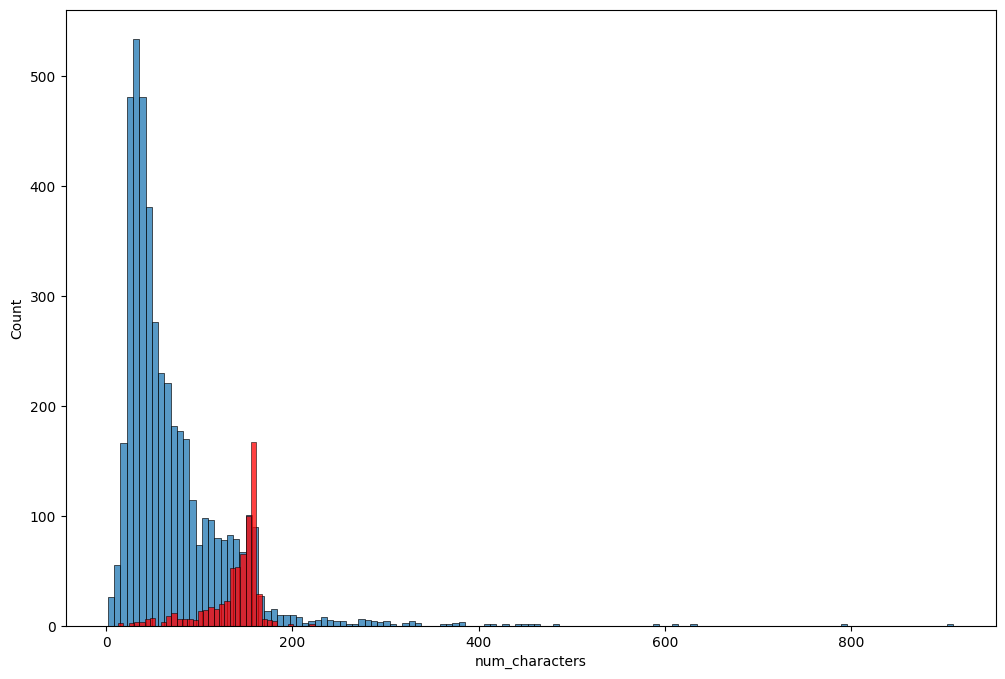

In [26]:
# we are plotting histogram
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

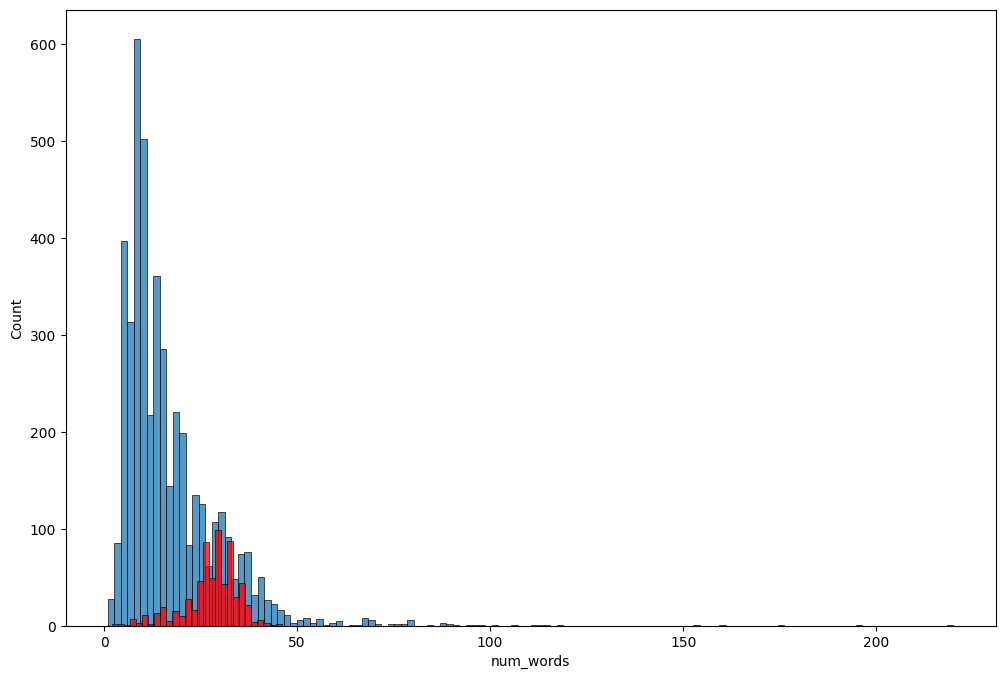

In [27]:
# we are plotting histograms
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")

# We are making pair plot

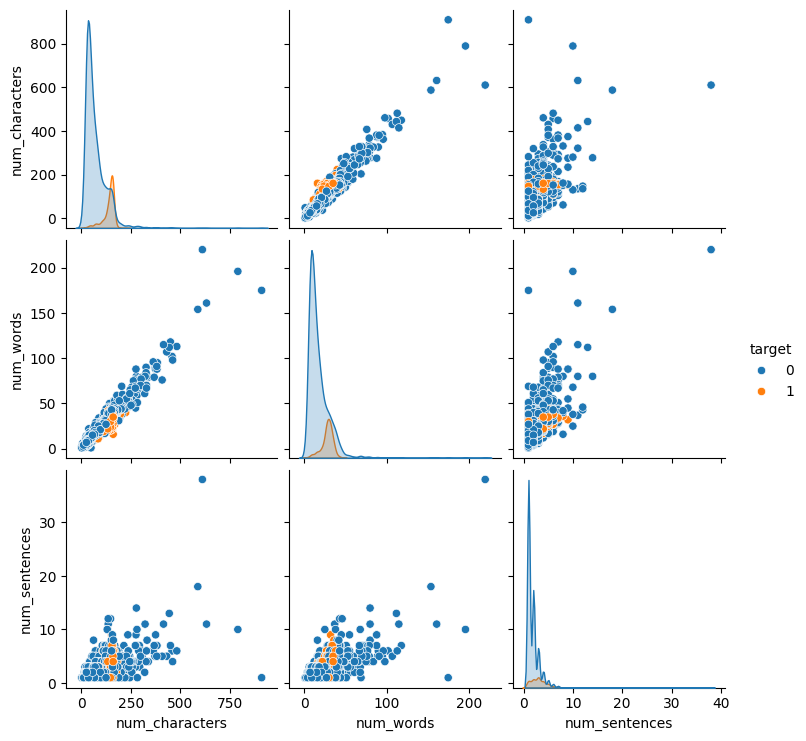

In [28]:
sns.pairplot(df,hue="target")

# 3. **Data Preprocessing** 

- Lowercase
- Tokenization
- Removing Special Characters
-  Removing Stopwords and punctuation
-  Stemming
   


In [29]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower()
    # tokenization
    text = nltk.word_tokenize(text)
    
    # removing special characters and punctuation
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    # stemming        
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))        
            
    return " ".join(y)

In [31]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [32]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [33]:
# now we do transform text
df["transformed_text"] = df["text"].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Now we genearte the word cloud of Spam SMS #

In [34]:
from wordcloud import wordcloud

wc = wordcloud.WordCloud(width=500,height=500,min_font_size=10,background_color="white")

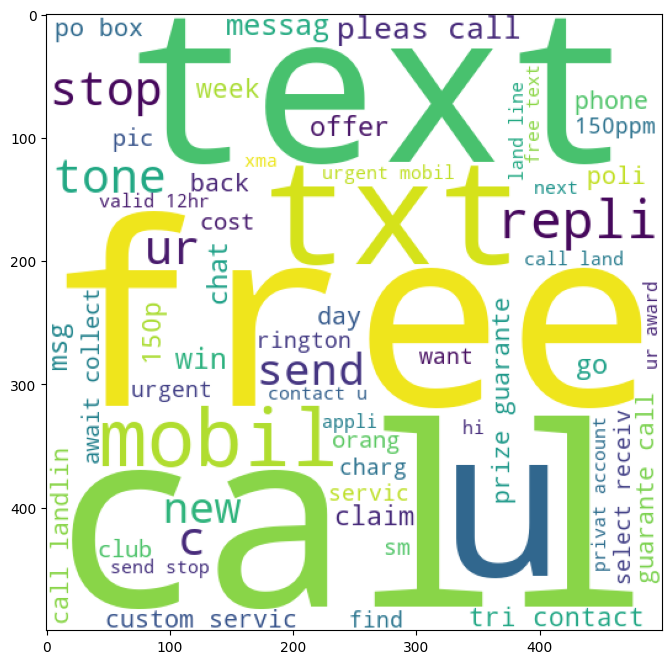

In [35]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep= " "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

# We Generate the word cloude of Ham SMS

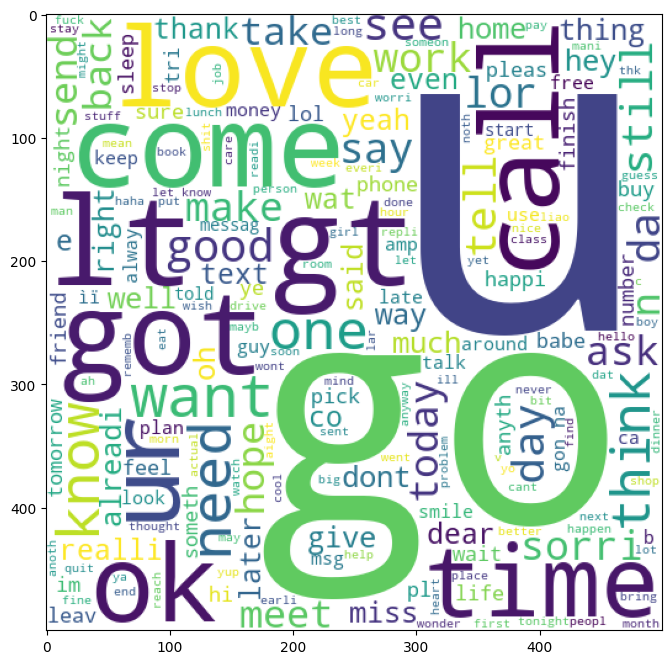

In [36]:
# for ham sms
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep= " "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [37]:
spam_corpous = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpous.append(word)

In [38]:
len(spam_corpous)

9939

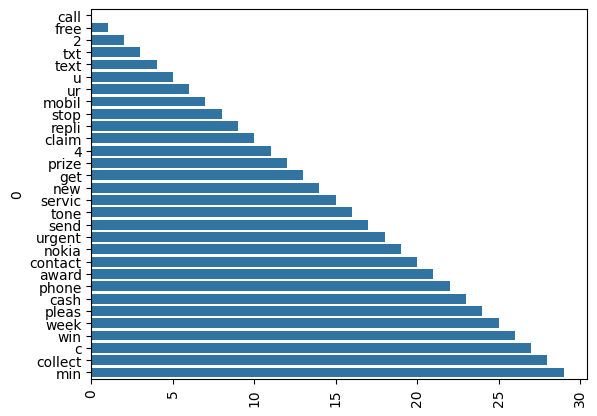

In [39]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpous).most_common(30))[0])
plt.xticks(rotation = "vertical")
plt.show()

In [40]:
ham_corpous = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpous.append(word)

In [41]:
# checking len ham_corpous
len(ham_corpous)

35404

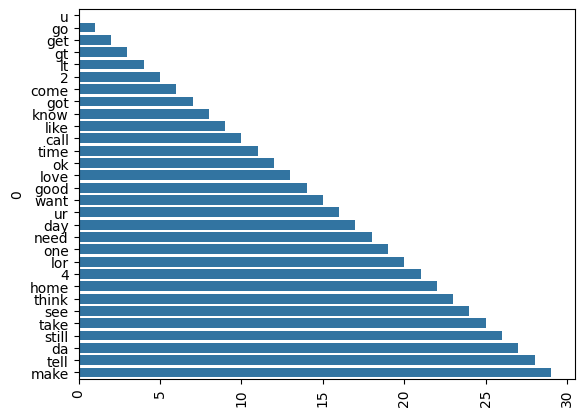

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpous).most_common(30))[0])
plt.xticks(rotation = "vertical")
plt.show()

In [43]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. **Model Building**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [45]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [46]:
# appending the num_character col to X
# X = np.hstack((X,df[["num_characters"]].values.reshape(-1,1)))

In [47]:
X.shape

(5169, 5000)

In [48]:
y = df["target"].values

In [49]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Splitting the Data into train and test split #

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=2)


In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
# gaussian naivebayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [54]:
# multinomial naivebayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622823984526112
[[896   0]
 [ 39  99]]
1.0


In [55]:
# Bernouli naivebayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[895   1]
 [ 22 116]]
0.9914529914529915


In [56]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver = "liblinear", penalty= "l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators =50,random_state=2)



In [57]:
clfs = {
    "SVC" : svc,
    "KN" : knc,
    "DT": dtc,
    "NB" : mnb,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbc,
    "xgb": xgb,
}
    
    
    

In [58]:
def train_classifier (clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [60]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For  KN
Accuracy:  0.902321083172147
Precision:  1.0
For  DT
Accuracy:  0.9487427466150871
Precision:  0.8057553956834532
For  NB
Accuracy:  0.9622823984526112
Precision:  1.0
For  LR
Accuracy:  0.9526112185686654
Precision:  0.9494949494949495
For  RF
Accuracy:  0.9700193423597679
Precision:  0.9908256880733946


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy:  0.9661508704061895
Precision:  0.9478260869565217
For  BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For  ETC
Accuracy:  0.9787234042553191
Precision:  0.9754098360655737
For  GBDT
Accuracy:  0.9526112185686654
Precision:  0.908256880733945
For  xgb
Accuracy:  0.9709864603481625
Precision:  0.9426229508196722


In [61]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False)

In [62]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.902321,1.000000
3,NB,0.962282,1.000000
5,RF,0.970019,0.990826
8,ETC,0.978723,0.975410
0,SVC,0.974855,0.974576
4,LR,0.952611,0.949495
6,AdaBoost,0.966151,0.947826
10,xgb,0.970986,0.942623
9,GBDT,0.952611,0.908257
7,BgC,0.958414,0.868217


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [64]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.902321
1,NB,Accuracy,0.962282
2,RF,Accuracy,0.970019
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.952611
6,AdaBoost,Accuracy,0.966151
7,xgb,Accuracy,0.970986
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


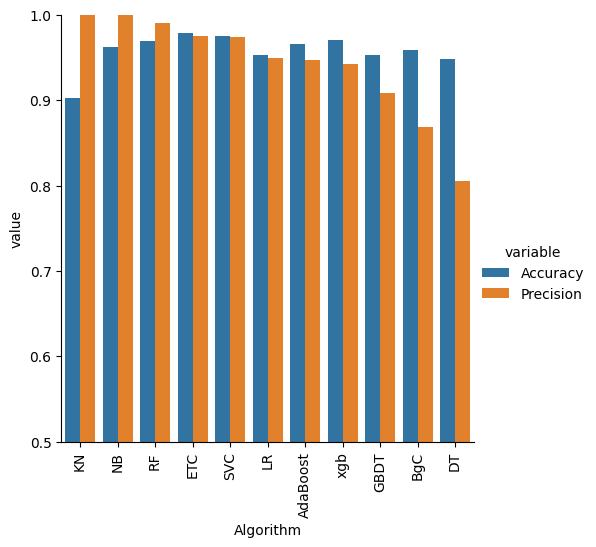

In [65]:
# we are making a catplot

sns.catplot(x = "Algorithm", y = "value",hue = "variable", data = performance_df1, kind = "bar", height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = "vertical")
plt.show()

# **Improve Model Performance**

In [66]:
temp_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max_ft_3000":accuracy_scores,"Precision_max_ft_3000":precision_scores}).sort_values("Precision_max_ft_3000",ascending=False)

In [67]:
performance_df.merge(temp_df,on = "Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.902321,1.000000,0.902321,1.000000
1,NB,0.962282,1.000000,0.962282,1.000000
2,RF,0.970019,0.990826,0.970019,0.990826
3,ETC,0.978723,0.975410,0.978723,0.975410
4,SVC,0.974855,0.974576,0.974855,0.974576
5,LR,0.952611,0.949495,0.952611,0.949495
6,AdaBoost,0.966151,0.947826,0.966151,0.947826
7,xgb,0.970986,0.942623,0.970986,0.942623
8,GBDT,0.952611,0.908257,0.952611,0.908257
9,BgC,0.958414,0.868217,0.958414,0.868217


In [68]:
# voting classifier 
svc = SVC(kernel="sigmoid", gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [69]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [70]:
VotingClassifier(estimators=[('svm', SVC(gamma=1.0,kernel = "sigmoid",
     probability=True)), ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier(n_estimators=50,random_state=2))], voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [71]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9915254237288136


# Applying Stacking #

In [72]:
estimators = [("svm",svc), ("nb",mnb), ("et",etc)]
final_estimator = RandomForestClassifier()

In [73]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [74]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [75]:
import pickle 
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))